<a href="https://colab.research.google.com/github/ZeyadSabbah/TrivagoRecommenderSystem/blob/master/Train_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Data Exploration Analysis

Since the challenge is already finished, and there is no submission, the test set mentioned in the TrivagoEDA is not available, test set had to be a subset from the train set, as well as the validation set. The purpose from this notebook is to explore the train data (without validation or test sets), so there is no bias or data leakage.
## Mounting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Trivago/Project/TrivagoRecommenderSystem

/content/drive/My Drive/Trivago/Project/TrivagoRecommenderSystem


## Loading Libraries & Training Dataset

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import math
import matplotlib.pyplot as plt
from datetime import datetime
import re
import random

In [4]:
filepath_item_metadata = '../../Datasets/raw_data/item_metadata.csv'
item_metadata = pd.read_csv(filepath_item_metadata)
item_metadata.head()

,item_id,properties
0,5101,Satellite TV|Golf Course|Airport Shuttle|Cosme...
1,5416,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
2,5834,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
3,5910,Satellite TV|Sailing|Cosmetic Mirror|Telephone...
4,6066,Satellite TV|Sailing|Diving|Cosmetic Mirror|Sa...


In [0]:
item_metadata.properties[0]

'Satellite TV|Golf Course|Airport Shuttle|Cosmetic Mirror|Safe (Hotel)|Telephone|Hotel|Sitting Area (Rooms)|Reception (24/7)|Air Conditioning|Hypoallergenic Rooms|Cable TV|Hotel Bar|Pool Table|Bathtub|Satisfactory Rating|Room Service|Luxury Hotel|Terrace (Hotel)|Television|Minigolf|Business Hotel|Shower|Cot|Gym|Hairdryer|Hypoallergenic Bedding|Accessible Parking|From 3 Stars|Good Rating|Radio|4 Star|From 4 Stars|Family Friendly|Desk|Tennis Court (Indoor)|Balcony|WiFi (Public Areas)|Openable Windows|Express Check-In / Check-Out|Restaurant|Laundry Service|Ironing Board|Tennis Court|From 2 Stars|Business Centre|Bowling|Conference Rooms|Electric Kettle|Accessible Hotel|Porter|Bike Rental|Non-Smoking Rooms|Car Park|Safe (Rooms)|Fitness|Fan|Flatscreen TV|Computer with Internet|WiFi (Rooms)|Lift|Central Heating'

In [5]:
filepath_train = '../../Datasets/clean_data/train.csv'
train = pd.read_csv(filepath_train)
train = train.drop(columns='Unnamed: 0')
train.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


Final Clickout is the main concert of this project, a dataframe for it specifically will be beneficial.

In [6]:
FinalClickoutDF = train[train.action_type=='clickout item'].groupby('session_id').tail(1)
FinalClickoutDF.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
15,00RL8Z82B2Z1,aff3928535f48,1541038485,16,clickout item,1257342,AU,"Sydney, Australia",mobile,NaN,55109|129343|54824|2297972|109014|1257342|1031...,162|25|150|143|101|49|118|131|18|100|101|143|5...
115,02SRUT1NQYH1,3599a6f709eab,1541063864,35,clickout item,2795374,FI,"Krakow, Poland",mobile,NaN,2795374|5582964|1088390|2781070|1258068|127196...,64|54|36|121|76|81|92|40|73|52|98|104|56|414|6...
122,03K8AXBL4BX2,ec139e10b9238,1541100652,7,clickout item,1032816,UK,"London, United Kingdom",desktop,NaN,12693|46363|81657|18448|47687|152913|18417|927...,104|92|100|103|102|104|72|85|81|75|107|86|98|8...
177,03P4VFKK12UO,325fafb5fa450,1541107538,55,clickout item,1320460,US,"Bakersfield, USA",desktop,Very Good Rating|5 Star|4 Star|Hotel|Motel|Res...,1306936|56482|2842358|6881276|65685|63259|6539...,178|104|110|94|57|96|46|61|48|35|50|38|59|44|5...
180,0473FZ8UNXRS,bcc452f3350eb,1541062532,3,clickout item,3143258,AU,"Legian, Indonesia",desktop,NaN,1258184|3866722|8929970|2315702|116619|1511641...,51|43|69|49|62|50|55|42|87|46|43|114|194|50|19...


## Attributes Exploration

### User_id and Session_id Attributes

In [0]:
print('number of unique users :', train.user_id.nunique())
print('number of unique sessions :', train.session_id.nunique())

number of unique users : 617354
number of unique sessions : 745755


### Timestamp Attribute

In [0]:
train.timestamp.head(1)

0    1541037460
Name: timestamp, dtype: int64

unix timestamp for each step by the user.

### Step Attribute

In [0]:
train.step.head(5)

0    1
1    2
2    3
3    4
4    5
Name: step, dtype: int64

Each step number is recorded which step is taken by the user.

{'whiskers': [<matplotlib.lines.Line2D at 0x15e16cbcf28>,
 'caps': [<matplotlib.lines.Line2D at 0x15e16ccf8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e16cbcdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x15e16ccff60>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e16ccfeb8>],
 'means': []}

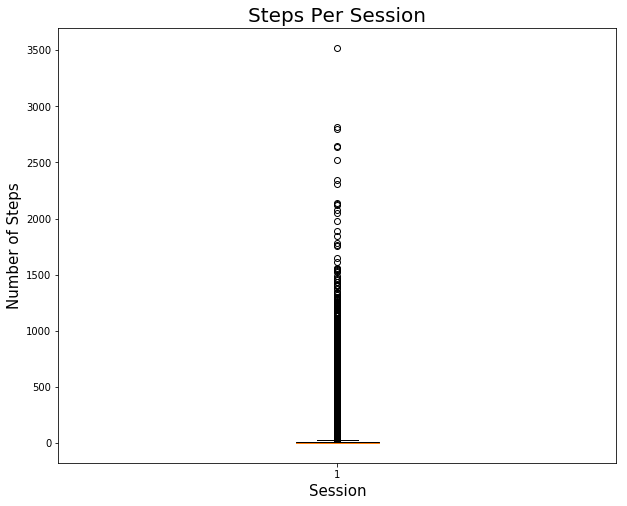

In [0]:
plt.figure(figsize=(10,8))
plt.title('Steps Per Session', fontsize=20)
plt.xlabel('Session', fontsize=15)
plt.ylabel('Number of Steps', fontsize=15)
plt.boxplot(train.groupby('session_id').step.max().values)

{'whiskers': [<matplotlib.lines.Line2D at 0x15e16f10f28>,
 'caps': [<matplotlib.lines.Line2D at 0x15e17339dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15e17339630>],
 'medians': [<matplotlib.lines.Line2D at 0x15e173426d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15e17342a20>],
 'means': []}

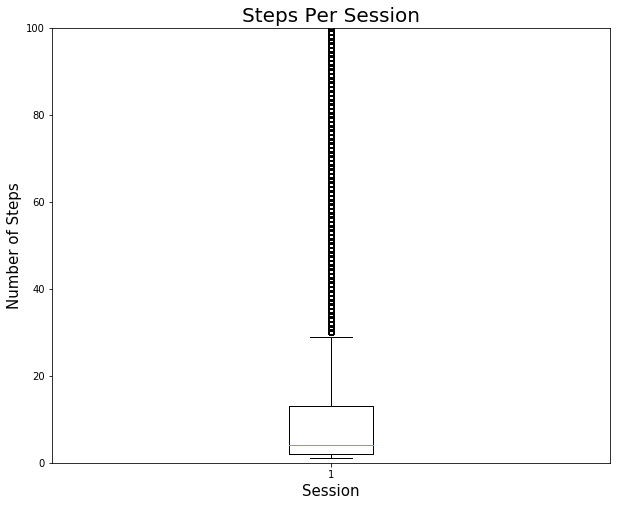

In [0]:
#just for the sake of clarification
plt.figure(figsize=(10,8))
plt.title('Steps Per Session', fontsize=20)
plt.xlabel('Session', fontsize=15)
plt.ylabel('Number of Steps', fontsize=15)
plt.ylim([0, 100])
plt.boxplot(train.groupby('session_id').step.max().values)

It seems that the maximum is 25 steps per session, so to see the percentage of outliers

In [0]:
TotalNumberOfSessions = len(train.groupby('session_id').step.max().values)
NumberOfSessionsStepOver200 = (train.groupby('session_id').step.max().values > 200).sum()
PercentageOfStepOver200 = NumberOfSessionsStepOver200/TotalNumberOfSessions
print('Percentage of sessions with maximum step value more than 200 is', round(PercentageOfStepOver200, 2)*100, '%.')

Percentage of sessions with maximum step value more than 200 is 1.0 %.


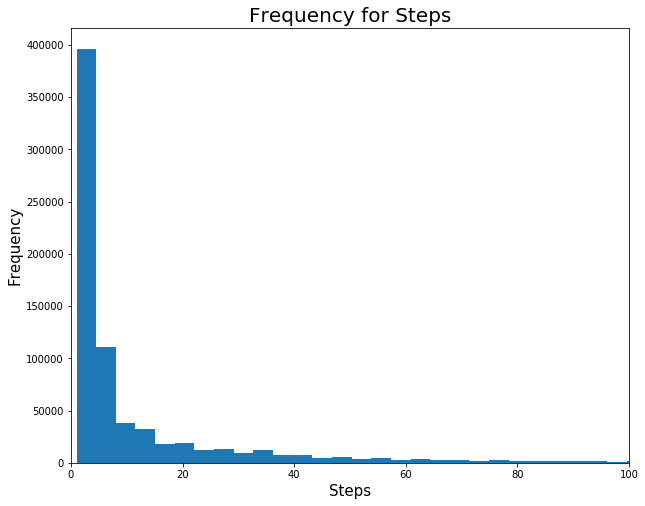

In [0]:
#In other words
plt.figure(figsize=(10,8))
plt.title('Frequency for Steps', fontsize=20)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlim([0, 100])
plt.hist(train.groupby('session_id').step.max().values, bins=1000);

Sessions that are high in steps are computational overhead and don't have valuable information.
One of the outliers has around 3500 steps in just one session.

A preprocessing function of removing sessions with high number of steps is needed.

In [0]:
#investigating further this type of sessions
train[train.step > 3000].tail(1)

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
7729607,9447211,6JWWFFNUMY6Y,3167404ed3197,1541368776,3522,interaction item rating,36455,TR,"Ankara, Turkey",mobile,NaN,NaN,NaN


train[train.session_id == '3167404ed3197'][train.action_type == 'clickout item']

In [0]:
#dropping sessions with more than 200 steps
SessionsOver200Steps = train[train.step > 200].session_id.values.tolist()
train = train[~train['session_id'].isin(SessionsOver200Steps)]

### Action_type Attribute

In [0]:
train.action_type.unique(), train.action_type.nunique()

(array(['search for poi', 'interaction item image', 'clickout item',
        'interaction item info', 'search for destination',
        'filter selection', 'interaction item rating', 'search for item',
        'change of sort order', 'interaction item deals'], dtype=object), 10)

The 'clickout item' is the value of which can be a sign of if the row does have the label or not. It is the most valuable value.

### Reference Attribute

In [0]:
train.reference.dropna().head(1)

1    666856
Name: reference, dtype: object

The reference value is the item's id which the user has selected to proceed item's website, if this is the final clickout item in the session (as a session can have more than one clickout item in the action_type attribute), then that's an indication that the user is happy with this item.
If this is not a clickout item, then the user is just interacting with the item in a way or another, like checking rating, reviews, point of interest, and so on.

In [0]:
train.reference.dropna().nunique()

314611

There are 314,611 unique items in the reference attribute.

In [0]:
FinalClickoutDF.reference.dropna().nunique()

207596

There are only 207,596 unique items have been selected as final clickout item. 

### Platrform Attribute

In [0]:
train.platform.unique(), train.platform.nunique()

(array(['AU', 'BR', 'FI', 'UK', 'US', 'MX', 'FR', 'IT', 'AT', 'HK', 'RU',
        'IN', 'CO', 'ES', 'CL', 'CH', 'BE', 'AR', 'NL', 'CA', 'JP', 'SE',
        'DE', 'MY', 'HU', 'PH', 'ZA', 'PE', 'ID', 'NZ', 'CZ', 'BG', 'DK',
        'TH', 'HR', 'TR', 'IE', 'IL', 'SG', 'EC', 'SK', 'NO', 'AA', 'TW',
        'PT', 'RO', 'PL', 'UY', 'GR', 'RS', 'KR', 'AE', 'SI', 'CN', 'VN'],
       dtype=object), 55)

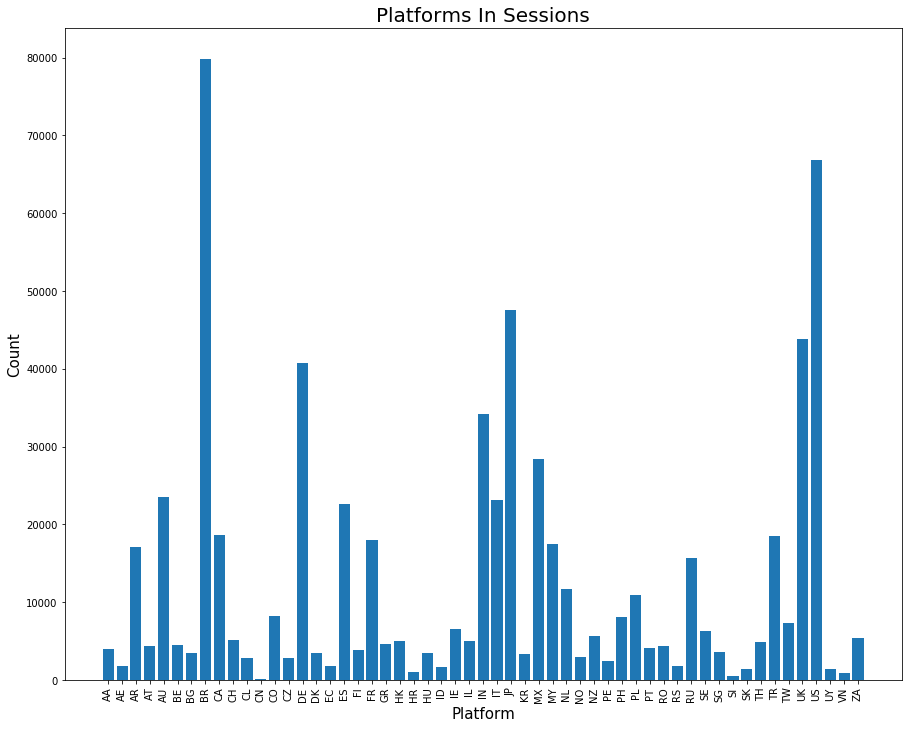

In [0]:
plt.figure(figsize=(15,12))
plt.title('Platforms In Sessions', fontsize=20)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
x = FinalClickoutDF.groupby('platform').platform.count().index.tolist()
y = FinalClickoutDF.groupby('platform').platform.count().values.tolist()

plt.bar(x, y);

The platform the user using can be an important feature (cluster) to the users using the same platform.

### City Attribute

In [0]:
#city in the whole training set
train.city.head(2), train.city.nunique()

(0    Sydney, Australia
 1    Sydney, Australia
 Name: city, dtype: object, 31609)

Sessions vary in their steps, and the value city can be determined multiple times in a session, so it would be misleading if it was not taken relative to the final clickout.

In [0]:
#city in the final in each session
FinalClickoutDF.city.nunique()

27859

*There are more than 31,609 unique cities.*  
**Note:** The rule of thumbs for embedding size is to be maximum 50.  

Ways to go for this attribute in Feature Preprocessing:  
1) Embeddings for all 31,609 cities with embedding size equals 50.  
2) converting them into countries assuming that the same country can carry most of the same features of all cities. it is an important categorical feature, but still it will be with the same embedding size. (Lose information, no point in that.)  
3) Not going with embeddings at all, and convert cities into continents, and use one-hot-encoding.  
4) Dividing the cities into ranges based on how many times each city has been mentioned. Number of categories is flexible.

Personally, I would prefer the first option. (To be discussed)

In [0]:
#converting cities into countries
train.city.apply(lambda x: x.split(', ')[1]).head(2), train.city.apply(lambda x: x.split(', ')[1]).nunique()

(0    Australia
 1    Australia
 Name: city, dtype: object, 217)

*There are 217 countries.*

In [7]:
countries = train.city.apply(lambda x: x.split(', ')[1])
countries.value_counts()[0:10]

Brazil            2023436
USA               1355776
Mexico             811561
Turkey             612928
United Kingdom     594269
Spain              571270
Germany            551038
India              526065
Italy              508695
Japan              506671
Name: city, dtype: int64

### Device Attribute

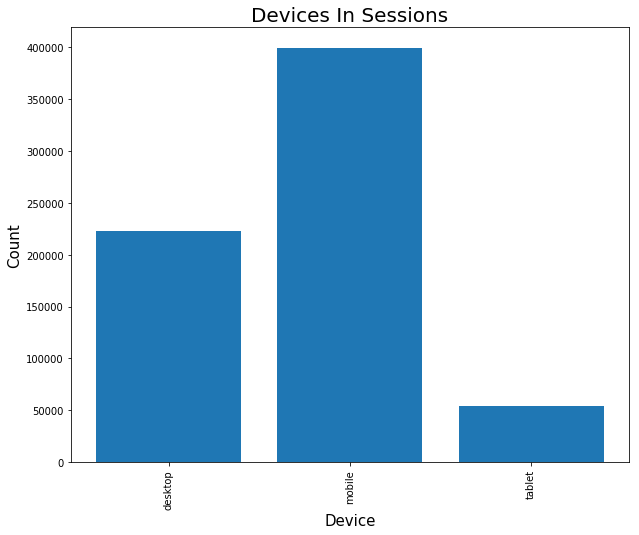

In [0]:
plt.figure(figsize=(10,8))
plt.title('Devices In Sessions', fontsize=20)
plt.xlabel('Device', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
x = FinalClickoutDF.groupby('device').device.count().index.tolist()
y = FinalClickoutDF.groupby('device').device.count().values.tolist()
plt.bar(x, y);

Should be One hot encoded in the feautres.

### Current_filters Attribute

In [0]:
train[train.current_filters.notnull()].tail(10)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
13019474,ZF0LUA90W6N5,a1ef4ebfc1d4e,1541536755,36,filter selection,NaN,RU,"Dubai, United Arab Emirates",mobile,Breakfast Included,NaN,NaN
13019483,ZF0LUA90W6N5,a1ef4ebfc1d4e,1541536915,45,clickout item,8898,RU,"Dubai, United Arab Emirates",mobile,Breakfast Included,1700901|6675008|5681204|7012304|8916|2735957|3...,433|920|963|805|1460|583|465|438|416|324|730|4...
13019484,ZF0LUA90W6N5,a1ef4ebfc1d4e,1541537054,46,clickout item,8906,RU,"Dubai, United Arab Emirates",mobile,Breakfast Included,8898|5742368|9226924|897635|3217130|8906|43253...,145|146|145|86|129|144|131|128|65|129|113|117|...
13019489,ZJDL3D3ON4FT,64dd4819d10e4,1541536687,4,filter selection,NaN,ES,"Almeria, Spain",mobile,Sort by Price,NaN,NaN
13019490,ZJDL3D3ON4FT,64dd4819d10e4,1541536712,5,clickout item,914561,ES,"Almeria, Spain",mobile,Sort by Price,996355|191826|40377|201066|951795|914561|59229...,32|33|36|36|36|37|37|40|41|42|42|42|44|46|46|4...
13019493,ZJDL3D3ON4FT,64dd4819d10e4,1541537148,8,clickout item,914561,ES,"Almeria, Spain",mobile,Sort by Price,996355|191826|40377|201066|951795|914561|59229...,32|33|36|36|36|37|37|40|41|42|42|42|44|46|46|4...
13019494,ZJDL3D3ON4FT,64dd4819d10e4,1541537274,9,clickout item,40215,ES,"Almeria, Spain",mobile,Sort by Price,996355|191826|40377|201066|951795|914561|59229...,32|33|36|36|36|37|37|40|41|42|42|42|44|46|46|4...
13019552,ZYNMLE3MV3LK,62728015bec05,1541544491,16,clickout item,6617798,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...
13019553,ZYNMLE3MV3LK,62728015bec05,1541544540,17,clickout item,2712342,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...
13019555,ZYNMLE3MV3LK,62728015bec05,1541544973,19,clickout item,1161323,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...


The filter is criteria on how the user wants the list to be shown to them.

In [0]:
train.current_filters.unique(), train.current_filters.nunique()

(array([nan, 'Very Good Rating',
        'Very Good Rating|5 Star|4 Star|Hotel|Motel|Resort|Hostal (ES)',
        ...,
        'Very Good Rating|Hotel|Resort|4 Star|5 Star|Free WiFi (Combined)|Air Conditioning',
        'Very Good Rating|Hotel|Resort|4 Star|5 Star|Free WiFi (Combined)|Air Conditioning|Best Value',
        'Hotel Chain|Bed & Breakfast'], dtype=object), 44618)

The unique values of the current_filters are not right, as the information is given as string.

In [0]:
current_filtersList = []

current_filtersAllValues = train.current_filters.dropna().apply(lambda x: x.split('|')).tolist()
for sublist in current_filtersAllValues:
    for item in sublist:
        current_filtersList.append(item)

current_filtersList = set(current_filtersList)
current_filtersList, len(current_filtersList)

({'1 Night',
  '1 Star',
  '2 Nights',
  '2 Star',
  '3 Nights',
  '3 Star',
  '4 Star',
  '5 Nights',
  '5 Star',
  'Accessible Hotel',
  'Accessible Parking',
  'Adults Only',
  'Air Conditioning',
  'Airport Hotel',
  'Airport Shuttle',
  'All Inclusive (Upon Inquiry)',
  'Balcony',
  'Bathtub',
  'Beach',
  'Beach Bar',
  'Beauty Salon',
  'Bed & Breakfast',
  'Best Rates',
  'Best Value',
  'Bike Rental',
  'Boat Rental',
  'Body Treatments',
  'Boutique Hotel',
  'Bowling',
  'Breakfast Included',
  'Bungalows',
  'Business Centre',
  'Business Hotel',
  'Cable TV',
  'Camping Site',
  'Car Park',
  'Casa Rural (ES)',
  'Casino (Hotel)',
  'Central Heating',
  'Cheap',
  'Childcare',
  'Club Hotel',
  'Computer with Internet',
  'Concierge',
  'Conference Rooms',
  'Convenience Store',
  'Convention Hotel',
  'Cosmetic Mirror',
  'Cot',
  'Country Hotel',
  'Deals + Beach (AR)',
  'Deals + Beach (DE)',
  'Deals + Beach (DK)',
  'Deals + Beach (GR)',
  'Deals + Beach (IT)',
  'Dea

After checking the item_metadata file, embeddings of matching filters to the impressions list can be applied, so that the filter with the model can learn which items are stronger than others. (The more filters can be applied on, the stronger the item.)

In [8]:
train[(train.action_type=='clickout item') & (train.current_filters.isna())].head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
13,00RL8Z82B2Z1,aff3928535f48,1541037543,14,clickout item,109038,AU,"Sydney, Australia",mobile,NaN,3400638|1253714|3367857|5100540|1088584|666916...,95|66|501|112|95|100|101|72|82|56|56|143|70|25...
15,00RL8Z82B2Z1,aff3928535f48,1541038485,16,clickout item,1257342,AU,"Sydney, Australia",mobile,NaN,55109|129343|54824|2297972|109014|1257342|1031...,162|25|150|143|101|49|118|131|18|100|101|143|5...
115,02SRUT1NQYH1,3599a6f709eab,1541063864,35,clickout item,2795374,FI,"Krakow, Poland",mobile,NaN,2795374|5582964|1088390|2781070|1258068|127196...,64|54|36|121|76|81|92|40|73|52|98|104|56|414|6...
121,03K8AXBL4BX2,ec139e10b9238,1541100322,6,clickout item,1032816,UK,"London, United Kingdom",desktop,NaN,12693|46363|81657|18448|47687|152913|18417|927...,104|92|100|103|102|104|72|85|81|75|107|86|98|8...
122,03K8AXBL4BX2,ec139e10b9238,1541100652,7,clickout item,1032816,UK,"London, United Kingdom",desktop,NaN,12693|46363|81657|18448|47687|152913|18417|927...,104|92|100|103|102|104|72|85|81|75|107|86|98|8...


It is not essential that the user can have filter in a clickout.

### Impressions Attribute

List of maximum 25 items given to the user in order by trivago recommender system. The list is not given in this dataset unless the user has decided to proceed to the item's website (action_type=='clickout item').

In [0]:
train.impressions.dropna().head(2)

13    3400638|1253714|3367857|5100540|1088584|666916...
15    55109|129343|54824|2297972|109014|1257342|1031...
Name: impressions, dtype: object

### Prices Attribute

List of maximum 25 prices of the items given respectively. The list is not given in this dataset unless the user has decided to proceed forward to the item's (action_type=='clickout item').

In [0]:
train.impressions.dropna().head(2)

13    3400638|1253714|3367857|5100540|1088584|666916...
15    55109|129343|54824|2297972|109014|1257342|1031...
Name: impressions, dtype: object

## Extended EDA

### Number of Clickouts per Session

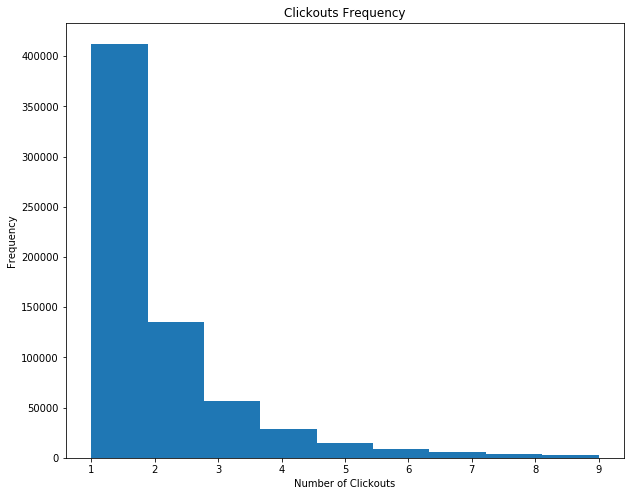

In [0]:
NClickoutSession = train[train.action_type=='clickout item'].groupby('session_id', sort=False).action_type.count()

#creating a dataframe of session_id and NumberOfClickouts
NClickoutSessionDF = NClickoutSession.to_frame()
NClickoutSessionDF.reset_index(level=0, inplace=True)
NClickoutSessionDF = NClickoutSessionDF.rename(columns={'action_type':'NumberOfClickouts'})

#removing sessions with more than 9 clickouts to have number of clickouts histogram
plt.figure(figsize=(10, 8))
plt.title('Clickouts Frequency')
plt.xlabel('Number of Clickouts')
plt.ylabel('Frequency')
plt.hist(NClickoutSessionDF[NClickoutSessionDF.NumberOfClickouts<10].NumberOfClickouts, bins=9);

Sessions with just one clickout is the majority. All papers were only interested in the final clickout which makes all sessions as just on clickout. My question that I want to answer, what if I consider the clickouts before the final clickout in training, would it be better for the model in performance or worse?

### Sessions without Clickouts

Some sessions don't even have a clickout, these sessions have no use as they don't actually have labels.
These sessions should be removed.

In [0]:
AllSessions = set(train.session_id.tolist())
SessionsClickout = set(train[train.action_type=='clickout item'].session_id.tolist())
SessionsNoClickout = AllSessions - SessionsClickout

print("Number of sessions that don't have even one clickout is", len(SessionsNoClickout), ", and it's percentage to all sessions is"
     , round(len(SessionsNoClickout)/len(AllSessions), 2)*100, '%.')

#dropping Sessions without Clickouts
train = train[~train['session_id'].isin(list(SessionsNoClickout))]

Number of sessions that don't have even one clickout is 67817 , and it's percentage to all sessions is 9.0 %.


### Impressions-Prices

A function that converts impressions into a list of items, and prices into a list of integers that represent prices of these items.

The list of items is in order of the ranks given by Trivago, and the same applies to the prices.

In [0]:
def plot_impression_price(session_id):
  '''
  Desc: Functions that gets a plot of the impressions and the prices of them that visualize what the interacted with items are
        and what the behaviour of the user is in this session checking all the items in the lis.
        
  Input: session_id: String with the session id that needs to be checked
  
  Output: Scatter plot with color visualization
  '''  
  try:                                          
    impression = train[train.session_id == session_id][train.action_type == 'clickout item'].tail(1).impressions.values[0].split('|')
    price = train[train.session_id == session_id][train.action_type == 'clickout item'].tail(1).prices.values[0].split('|')
    price = list(map(int, price))               #converting list of strings into integers
    clickout_item = train[train.session_id == session_id][train.action_type == 'clickout item'].tail(1).reference.values[0]
    all_interacted_with_items = train[train.session_id == session_id].reference.unique().tolist()
    
    for i in range(len(impression)):            #getting the clickout item
      if clickout_item == impression[i]:
        rank = i
    
    interacted_with_items = []
    interacted_with_items_prices = []
    for item in all_interacted_with_items:      #getting interacted with items
      for i in range(len(impression)):
        if item == impression[i]:
          interacted_with_items.append(item)
          interacted_with_items_prices.append(price[i])
                                                #plotting the output
    plt.figure(figsize=(10,8))
    plt.title('Impressions and Prices', fontsize=30)
    plt.xlabel('Impressions', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.xticks(rotation=90)                     #Interacted with items are in red points
    plt.plot(impression, price, 'o')            #Final clickout item is in black
    plt.plot(interacted_with_items, interacted_with_items_prices, 'o', color='red')
    plt.plot(clickout_item, price[rank] , 'o', color='black')
  except:
    pass  

Red dots mean that the user interacted with these items, black dot means that this is the item the user has chosen.
On the x-axis, lie the items that appear to the user in order, from left is the top of the list to the right which is the bottom of the list. While on the y-axis, lie the prices of each item.

C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\zeyad_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


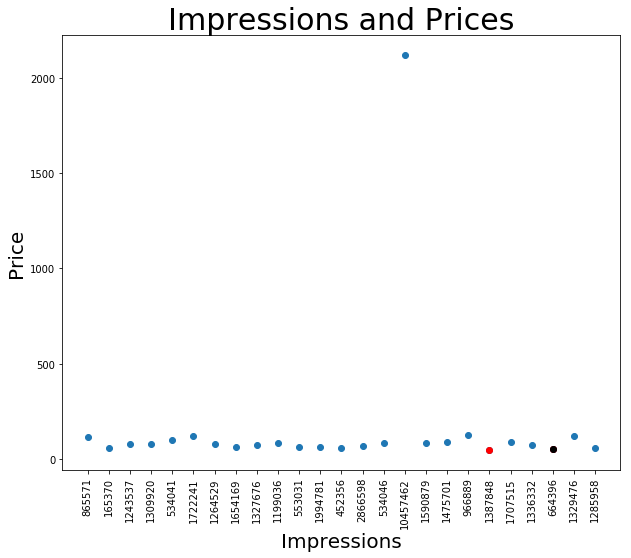

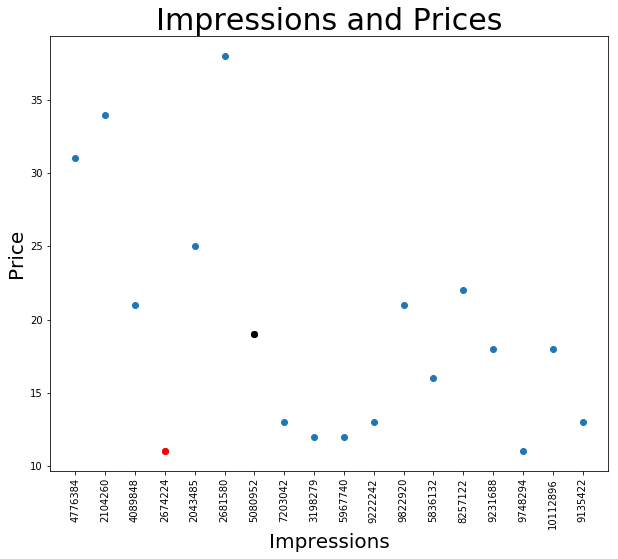

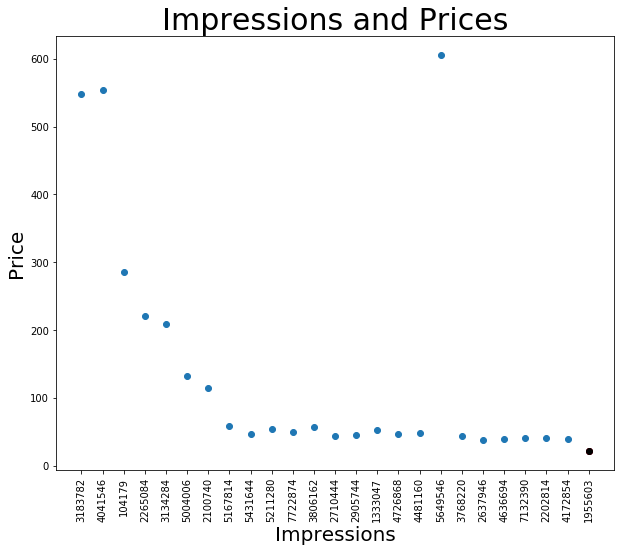

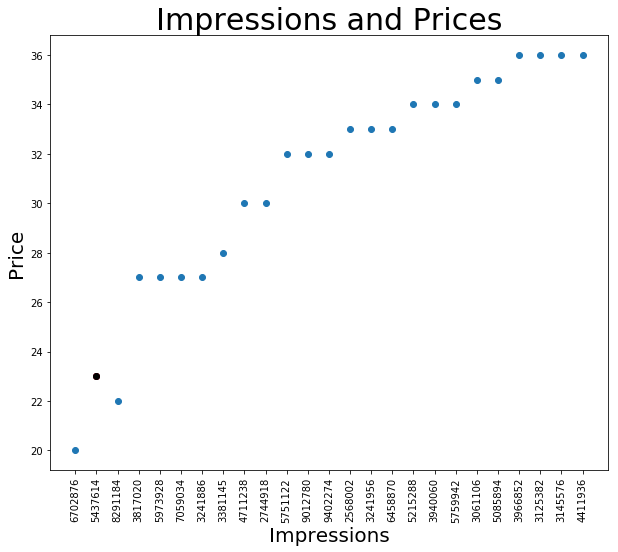

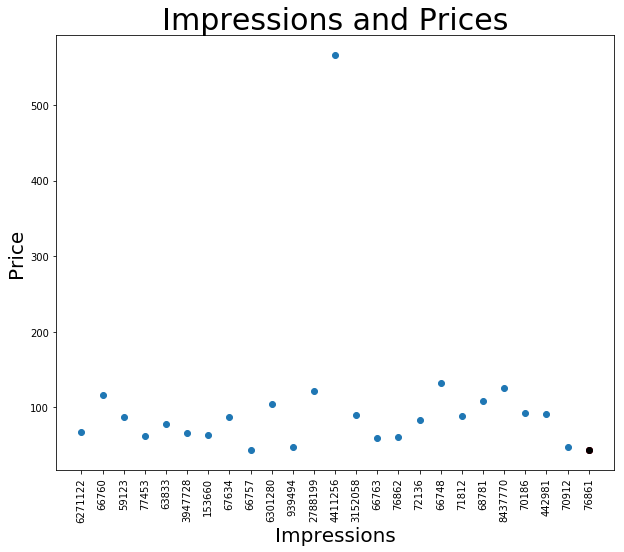

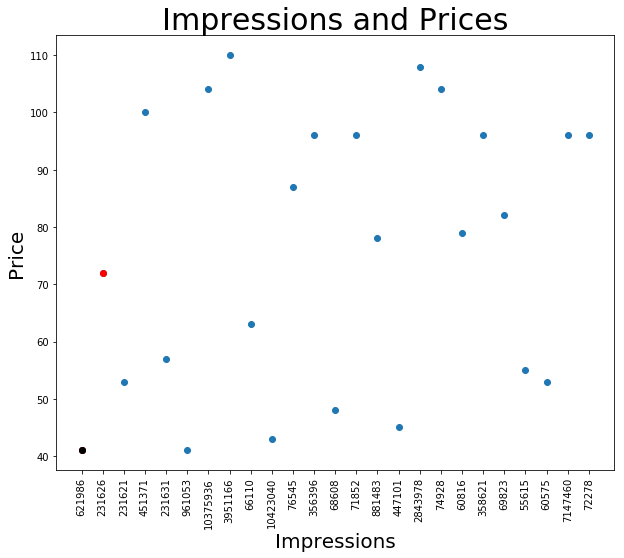

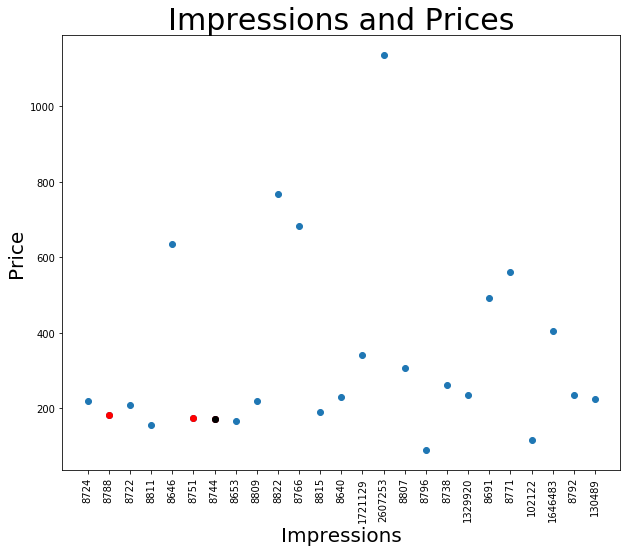

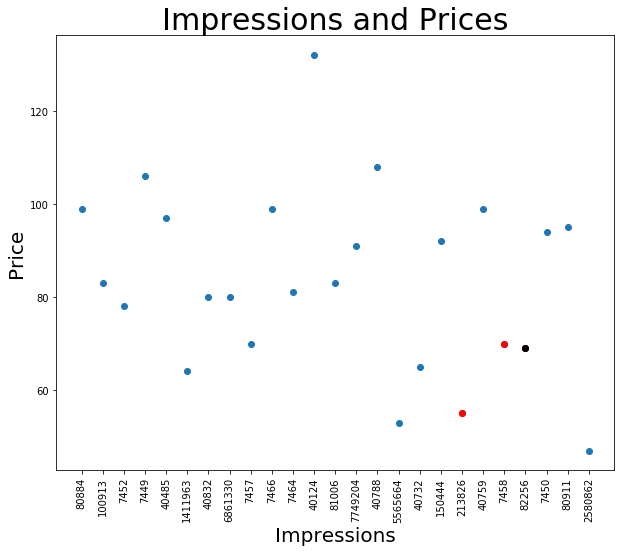

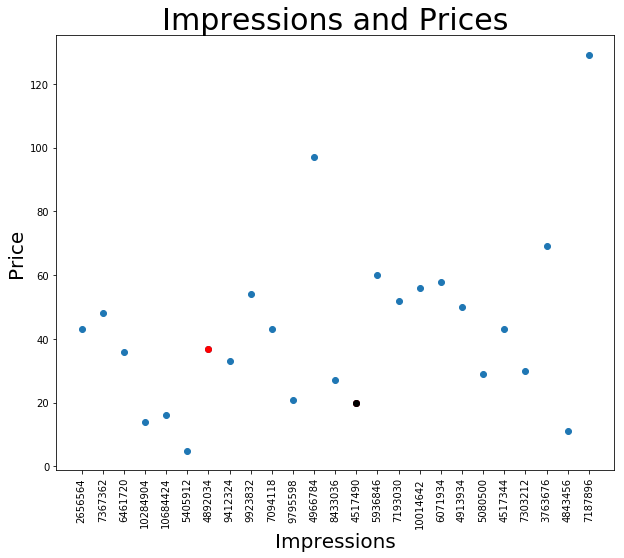

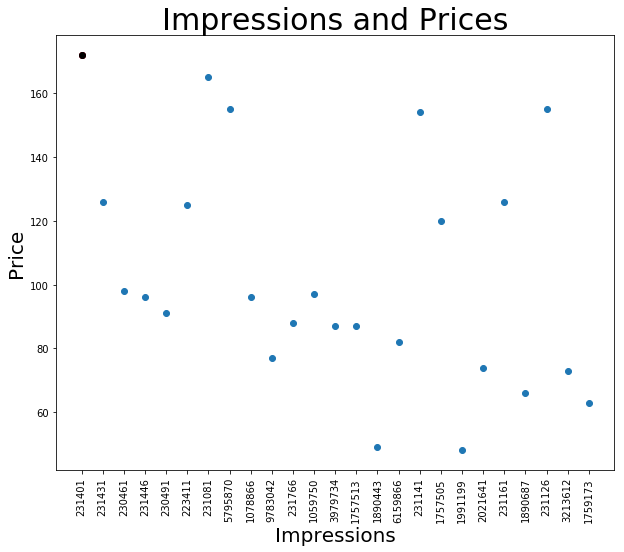

In [0]:
#getting a random plots for the interactions between the user and items
random.seed(0)
listOfSessions = random.choices(train.session_id.unique(), k=10)
for session_id in listOfSessions:
  plot_impression_price(session_id)

Two clear things can be noticed, the first is that many of the plots have the black and red dots in the left side of the plot, which means that the user prefer the items on the top of the list. The second thing is, that the black point is little bit close to the horizontal level of the red point, which means that the user prefers the same range of price.

### Total Time Spent

In [0]:
#getting the time spent in each session in seconds
TotalTimeSpentPerSession = train.groupby('session_id').timestamp.last() - train.groupby('session_id').timestamp.first()
TotalTimeSpentPerSession.head()

session_id
00000510f1adc      0
00003f3b20954      0
000056cd97ce2    255
000066611146f     25
0000c0fb51e11     51
Name: timestamp, dtype: int64

In [0]:
#checking for the values
TotalTimeSpentPerSession.min()

-270818

The minimum value should be 0 (since it is time spent). That shows that something is not consistent in the dataset. The sessions steps are not put in order for some sessions.
Another functions will be used to get through this.

In [0]:
train[train.session_id=='8c41f0b873b0b'].head(2)

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
975662,1190260,PBIZWRQOUBVE,8c41f0b873b0b,1541544799,1,clickout item,928649,TR,"Istanbul, Turkey",desktop,NaN,928649|2786846|927845|2631584|4414636|37539|98...,129|87|111|167|42|116|71|36|45|80|71|40|45|50|...
8432290,10308397,PBIZWRQOUBVE,8c41f0b873b0b,1541273844,1,interaction item image,4584962,TR,"Istanbul, Turkey",desktop,NaN,NaN,NaN


In [0]:
#using max and min functions instead of last and min functions
TotalTimeSpentPerSession = train.groupby('session_id').timestamp.max() - train.groupby('session_id').timestamp.min()
TotalTimeSpentPerSession.min(), TotalTimeSpentPerSession.max()

(0, 404403)

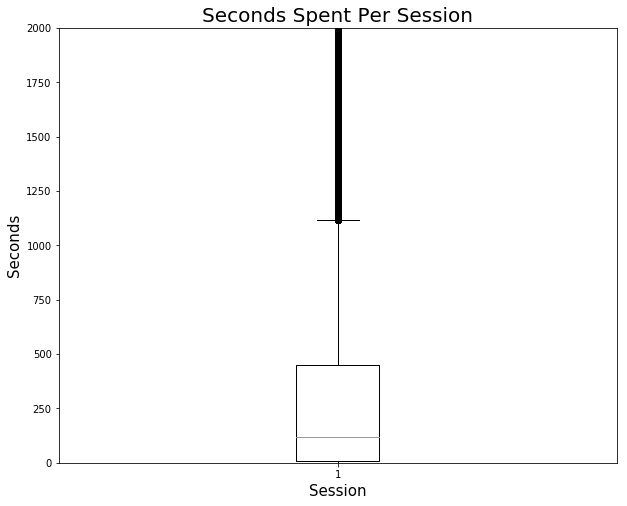

In [0]:
plt.figure(figsize=(10,8))
plt.title('Seconds Spent Per Session', fontsize=20)
plt.xlabel('Session', fontsize=15)
plt.ylabel('Seconds', fontsize=15)
plt.ylim(0, 2000)
plt.boxplot(TotalTimeSpentPerSession);

In [0]:
#percentage of time spent more than the maximum
round((TotalTimeSpentPerSession[TotalTimeSpentPerSession>1140].count()/TotalTimeSpentPerSession.count())*100,2)

11.38

TotalSecondsSpent should be a feature as more features can be obtained from it.

### ReferenceTimeSpent

The time spent for each item the user has interacted with.

In [0]:
# function to remove words from the attribute
def RemoveNonItemsReference(data, column):
    '''
    Desc: function to remove Non-Items (words) from the attribute
    
    Input: data: Pandas DataFrame with the dataset to remove Non-Items from attribute
           column: String with the name of the attribute
           
    Output: NonItemRefSer: Pandas Series with the Item references only
    '''
    
    NonItemRefSer = data[column].apply(lambda x: pd.to_numeric(x, errors='coerce'))\
                                 .dropna().astype(int).apply(lambda x: str(x))
    return NonItemRefSer

In [0]:
train.reference = RemoveNonItemsReference(train, 'reference')
train.head(2)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,NaN,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


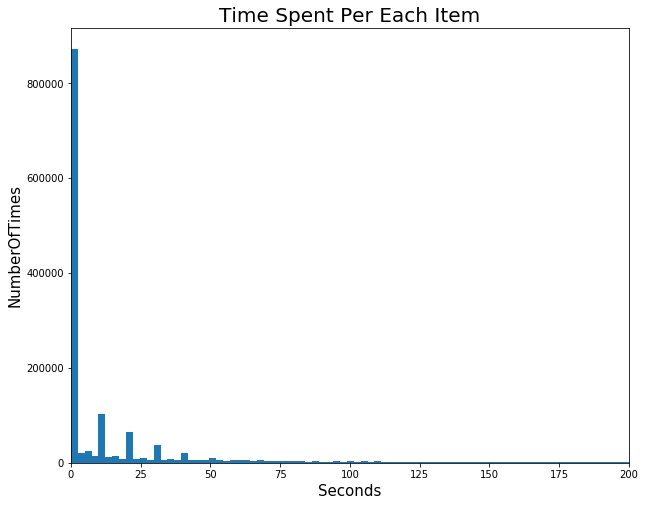

In [0]:
ReferencesSpentSeconds = train.groupby(['session_id', 'reference']).timestamp.max()\
                        - train.groupby(['session_id', 'reference']).timestamp.min()
plt.figure(figsize=(10,8))
plt.title('Time Spent Per Each Item', fontsize=20)
plt.xlabel('Seconds', fontsize=15)
plt.ylabel('NumberOfTimes', fontsize=15)
plt.xlim([0, 200])
plt.hist(ReferencesSpentSeconds.values, bins = 100000);

Time spent on each item refers to how much the user may like the item. This can be a feature, and the relative time spent on a feature to the total time spent in a session can be another feature.

### Clickout item in Impression List

Checking that reference in the final click out is actually an item from the list provided in the impressions list, making sure that this label is right, otherwise it should be dropped from the training set.

In [0]:
ReferenceItem = train[train.action_type == 'clickout item'].groupby('session_id').tail(1).reference

ImpressionsList = train[train.action_type == 'clickout item'].groupby('session_id').tail(1).impressions\
                                                             .apply(lambda x: x.split('|'))

#Extracting the indeces of the clickout item that is not in the impressions list
ClickoutNotInImpressionListIndex = []

for index in ImpressionsList.index.tolist():
    if str(ReferenceItem[index] in ImpressionsList[index]) == 'False':
        ClickoutNotInImpressionListIndex.append(index)

For example

In [10]:
print('Number of sessions that have a clickout item that is not in the impressions list',
      len(ClickoutNotInImpressionListIndex), '.')
train[train.index==10027960]

Number of sessions that have a clickout item that is not in the impressions list 281 .


,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
10027960,51V9OE5PL3P6,c987c56bf4071,1541430127,14,clickout item,128515,AR,"Foz do Iguaçu, Brazil",desktop,NaN,478776|106946|9170040|991597|478861|323956|107...,135|223|45|57|79|96|206|51|120|110|112|51|90|1...


In [11]:
#Is the value in reference in the impressions list?
'128515' in train[train.index==10027960].impressions[10027960].split('|')

False

In [0]:
#dropping sessions with a final clickout item not in the impressions list
SessionsClickoutNotInImpressionList = train[train.index.isin(ClickoutNotInImpressionListIndex)].session_id.tolist()
train = train[~train.session_id.isin(SessionsClickoutNotInImpressionList)]